uni # TODO: Replace this with your UNI

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [11]:
class SignLanguage:
    def __init__(self):
        self.model = None

    def create_model(self):
        # Create a sequential model
        model = Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(24, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model = model
    def prepare_data(self, images, labels):
        # Normalize images and split into train and validation sets
        images = images / 255.0
        images = images.reshape(-1, 28, 28, 1)
        encoder = OneHotEncoder(sparse_output=False)
        labels = encoder.fit_transform(labels.reshape(-1, 1))
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

    def train(self, batch_size, epochs, verbose):
        # Train the model
        history = self.model.fit(
            self.X_train, self.y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose,
            validation_data=(self.X_val, self.y_val)
        )
        return history

    def predict(self, data):
        # Predict on test data
        data = data / 255.0
        data = data.reshape(-1, 28, 28, 1)
        return np.argmax(self.model.predict(data), axis=1)

    def visualize_data(self, data):
        # Visualize the first few samples
        fig, axes = plt.subplots(1, 5, figsize=(10, 5))
        for i in range(5):
            axes[i].imshow(data[i].reshape(28, 28), cmap='gray')
            axes[i].axis('off')
        plt.show()

    def visualize_accuracy(self, history):
        # Plot training and validation accuracy
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.legend()
        plt.show()



# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


# New Section

In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)
    my_model.create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


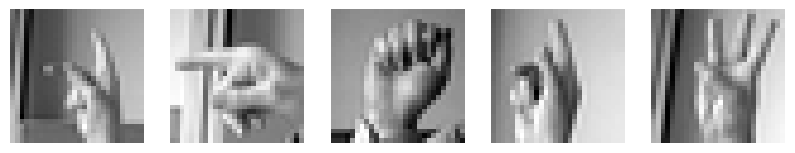

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.X_train)

Epoch 1/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 2.9417e-08
Epoch 2/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 8.0966e-08
Epoch 3/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9980 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 1.3742e-08
Epoch 4/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 2.1481e-07
Epoch 5/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9977 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 1.1723e-09
Epoch 6/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9981 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 3.3846e-06
Epoch 7/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 5.7813e-08
Epoch 8/60
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - los

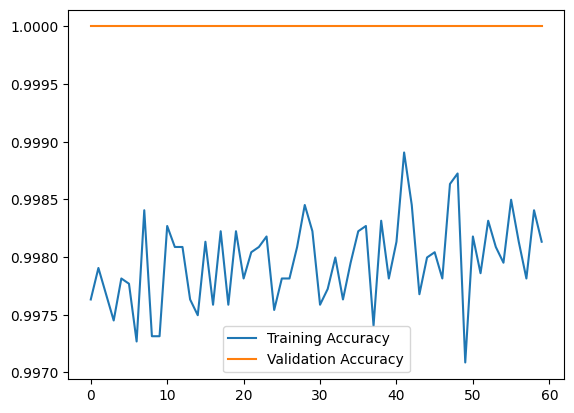

In [10]:
if __name__=="__main__":
    history = my_model.train(batch_size = 32, epochs=60, verbose=1)
    my_model.visualize_accuracy(history)

In [8]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = (accuracy_score(test_labels, y_pred)*2.2)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
0.9340490797546013
